In [ ]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
data = pd.read_excel('/content/Modified_Data_for_Analysis.xlsx')

# Define the dependent and independent variables for the model
y = data['Airbnb_Review_WTP']
X = data[['Rational_Review', 'Age_group_25to34', 'Age_group_35to54',
          'Annual_Income_$50,001to$75,000', 'Annual_Income_Above$100,000',
          'Annual_Income_$25,000to$50,000', 'Annual_Income_Below$25,000',
          'Annual_Income_$75,001to$100,000', 'Travel_Frequency_between1and2',
          'Travel_Frequency_between3and5', 'Travel_Frequency_between6and10',
          'Accommodation_Type_hotels', 'Accommodation_Type_Airbnb',
          'Accommodation_Type_hostels', 'Travel_Purpose_leisure',
          'Travel_Purpose_both', 'Travel_Purpose_business', 'Accommodation_Budget']]

# Add a constant to the model
X = sm.add_constant(X)

# Run the regression model
model1 = sm.OLS(y, X).fit()

# Display regression summary
model_summary = model1.summary()
print(model_summary)



                            OLS Regression Results                            
Dep. Variable:      Airbnb_Review_WTP   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           8.04e-42
Time:                        23:12:38   Log-Likelihood:                -510.49
No. Observations:                 113   AIC:                             1051.
Df Residuals:                      98   BIC:                             1092.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the model and use RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = X.drop(columns=['const'])

rfe.fit(X_rfe, y)
selected_features = X_rfe.columns[rfe.support_]

print("Selected features:", selected_features)


Selected features: Index(['Rational_Review', 'Annual_Income_Above$100,000',
       'Annual_Income_$25,000to$50,000', 'Annual_Income_Below$25,000',
       'Accommodation_Type_hotels'],
      dtype='object')


In [ ]:
# Define the dependent and independent variables for the model
y = data['Airbnb_Review_WTP']
X = data[['Rational_Review', 'Annual_Income_Above$100,000',
       'Annual_Income_$25,000to$50,000', 'Annual_Income_Below$25,000',
       'Accommodation_Type_hotels']]

# Add a constant to the model
X = sm.add_constant(X)

# Run the regression model
model2 = sm.OLS(y, X).fit()

# Display regression summary
model_summary = model2.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:      Airbnb_Review_WTP   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     10.37
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.93e-08
Time:                        23:12:45   Log-Likelihood:                -616.34
No. Observations:                 113   AIC:                             1245.
Df Residuals:                     107   BIC:                             1261.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

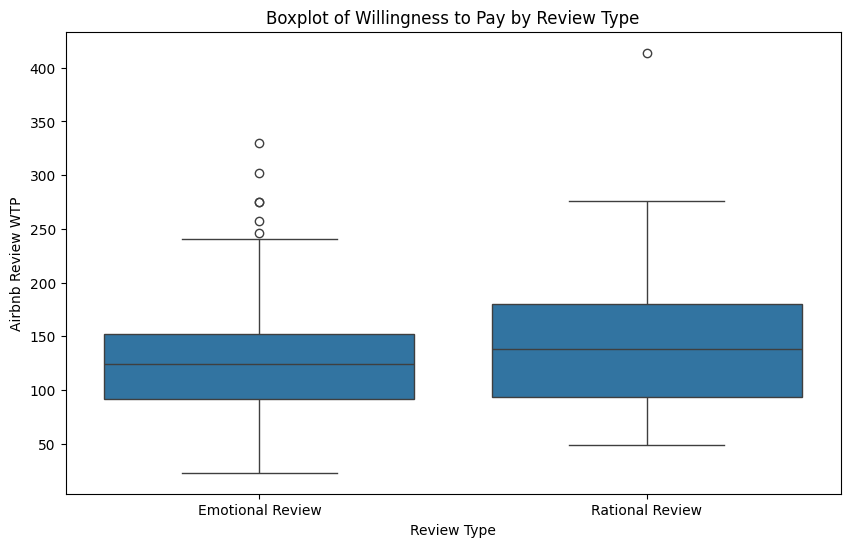

In [ ]:
# Plot 2: Box plot of WTP for Rational vs Emotional Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rational_Review', y='Airbnb_Review_WTP', data=data)
plt.xticks([0, 1], ['Emotional Review', 'Rational Review'])
plt.title("Boxplot of Willingness to Pay by Review Type")
plt.xlabel("Review Type")
plt.ylabel("Airbnb Review WTP")
plt.show()

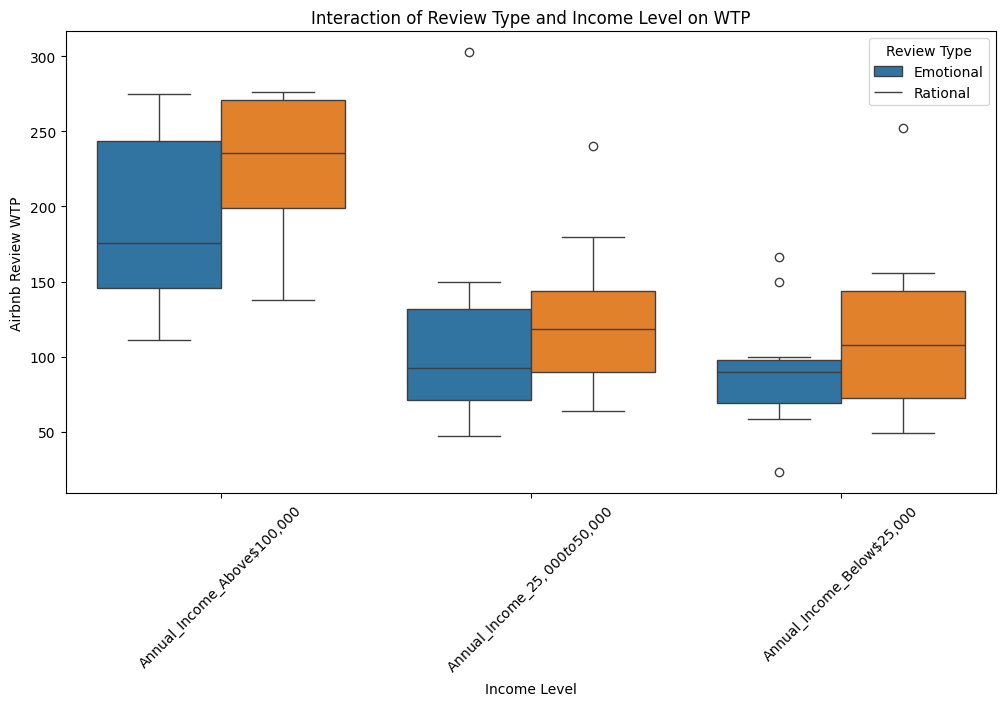

In [ ]:
from matplotlib import pyplot as plt
# Plot 3: Interaction of Review Type with Income Level on WTP
income_levels = ['Annual_Income_Above$100,000',
                 'Annual_Income_$25,000to$50,000', 'Annual_Income_Below$25,000',]

# Melting data for plotting interaction effects
data_interaction = data.melt(id_vars=['Rational_Review', 'Airbnb_Review_WTP'],
                             value_vars=income_levels, var_name="Income_Level", value_name="Present")
data_interaction = data_interaction[data_interaction['Present'] == 1]  # Filter to include only present categories

plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Level', y='Airbnb_Review_WTP', hue='Rational_Review', data=data_interaction)
plt.xticks(rotation=45)
plt.legend(title="Review Type", labels=["Emotional", "Rational"])
plt.title("Interaction of Review Type and Income Level on WTP")
plt.xlabel("Income Level")
plt.ylabel("Airbnb Review WTP")
plt.show()

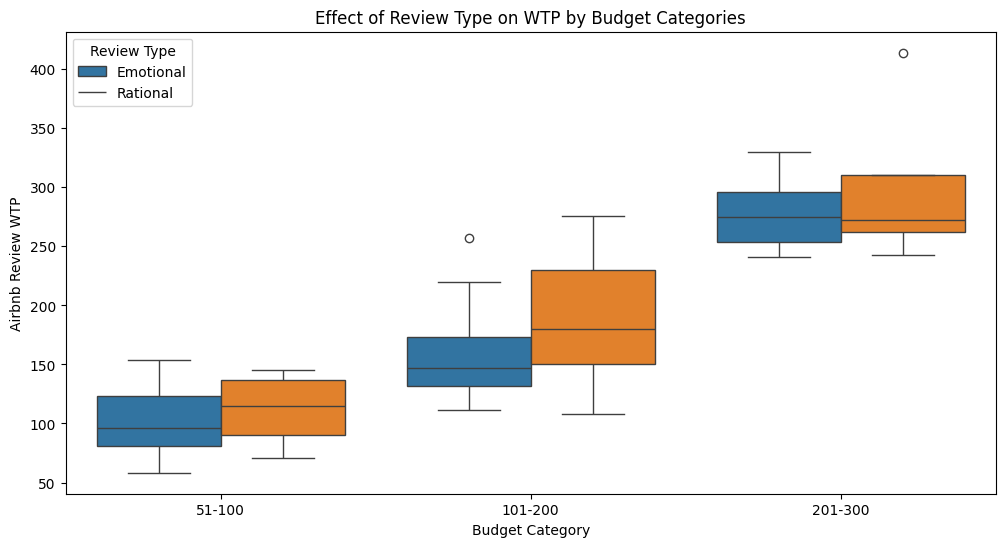

In [ ]:
# Plot 4: Review Type Impact by Budget Levels
# Creating budget categories
max_budget = data['Accommodation_Budget'].max() + 1  # Adding 1 to avoid duplication of the last bin edge
data['Budget_Category'] = pd.cut(data['Accommodation_Budget'],
                                 bins=[50, 100, 200, 300],
                                 labels=['51-100', '101-200', '201-300'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Budget_Category', y='Airbnb_Review_WTP', hue='Rational_Review', data=data)
plt.legend(title="Review Type", labels=["Emotional", "Rational"])
plt.title("Effect of Review Type on WTP by Budget Categories")
plt.xlabel("Budget Category")
plt.ylabel("Airbnb Review WTP")
plt.show()

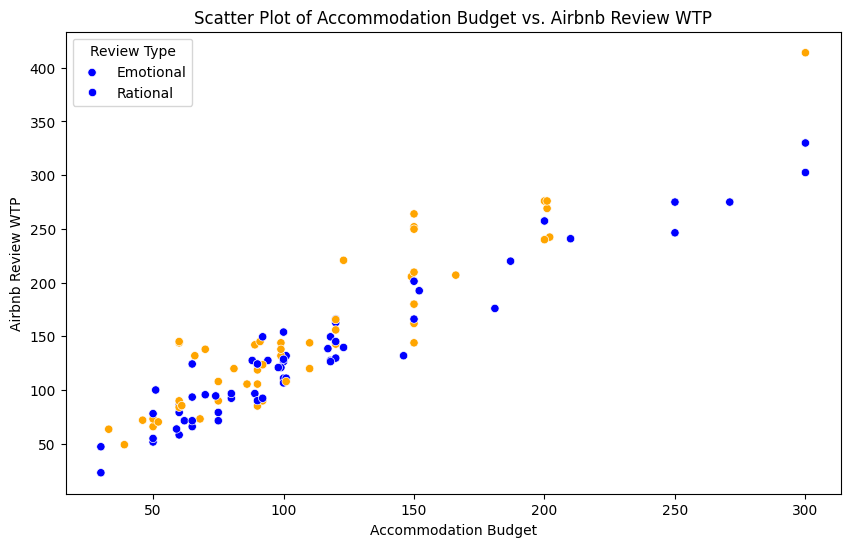

In [ ]:
# Ensure that Rational_Review is treated as a categorical variable
data['Rational_Review'] = data['Rational_Review'].astype('category')

# Plot with distinct colors for Rational and Emotional reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Accommodation_Budget', y='Airbnb_Review_WTP', data=data, hue='Rational_Review', palette=['blue', 'orange'])
plt.title("Scatter Plot of Accommodation Budget vs. Airbnb Review WTP")
plt.xlabel("Accommodation Budget")
plt.ylabel("Airbnb Review WTP")
plt.legend(title="Review Type", labels=["Emotional", "Rational"])
plt.show()

<ipython-input-12-6366c5861753>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=conf_int.index, data=conf_int.reset_index(), palette='Blues')


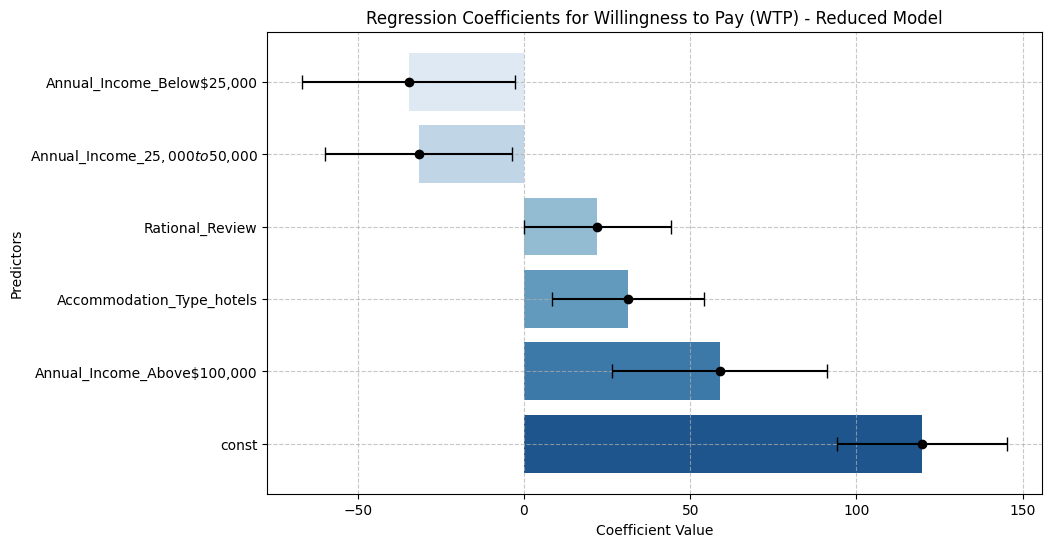

In [ ]:

# Define a LinearRegression model to use with RFE
lin_reg = LinearRegression()

# Use RFE with scikit-learn's LinearRegression to select top features
selector = RFE(estimator=lin_reg, n_features_to_select=5)
selector = selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]
X_reduced = X[selected_features]

# Fit the reduced model with statsmodels OLS using the selected features
X_reduced = sm.add_constant(X_reduced)
model_wtp_reduced = sm.OLS(y, X_reduced).fit()

coefficients = model_wtp_reduced.params
conf_int = model_wtp_reduced.conf_int()
conf_int['Coefficient'] = coefficients

conf_int.columns = ['Lower CI', 'Upper CI', 'Coefficient']
conf_int = conf_int.sort_values(by='Coefficient', ascending=True)

# Plotting reduced WTP model coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y=conf_int.index, data=conf_int.reset_index(), palette='Blues')
plt.errorbar(conf_int['Coefficient'], conf_int.index, xerr=[conf_int['Coefficient'] - conf_int['Lower CI'],
                                                             conf_int['Upper CI'] - conf_int['Coefficient']],
             fmt='o', color='black', capsize=5)
plt.title("Regression Coefficients for Willingness to Pay (WTP) - Reduced Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictors")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

